# Mart Sales Prediction 

WorK_flow ----->  Data Preprocessing ---> EDA -----> Train_test_Split---->HyperParameter tuning -->DecisionTreeRegressor---> Evaluation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Data Collection and Analysis

In [3]:
big_mart_data = pd.read_csv(r"C:\Users\udayk\Downloads\Train.csv")

In [6]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
-   Outlet_Identifier
-    Outlet_Size
-   Outlet_Location_Type
-    Outlet_Type  

#### Handling missing values

In [12]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna( big_mart_data['Item_Weight'].mean())

In [16]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we cannot fill outlet_size directly will mode because there is different modes for different oulet types. So we need to encounter it using pivot_table approch 

In [19]:
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda X:X.mode()[0]))

In [21]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [23]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [25]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [27]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [29]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Data Analysis

In [31]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
sns.set()

Weight


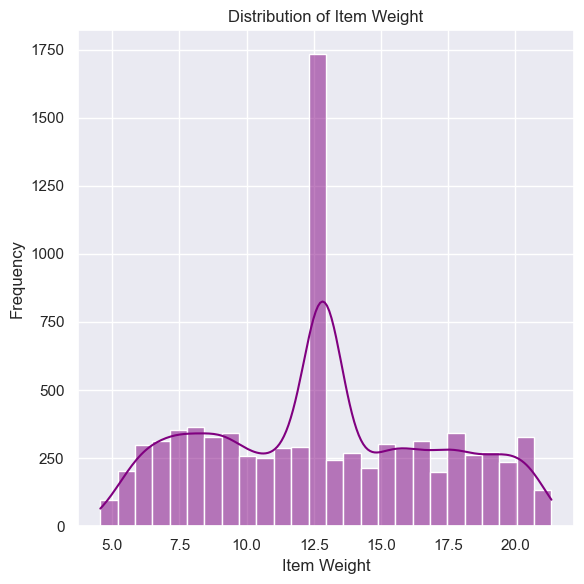

In [36]:
plt.figure(figsize=(6, 6))
sns.histplot( data=big_mart_data,x='Item_Weight',kde=True, color='purple' )

plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

--The distribution of item weight is mostly spread between 5 kg and 20 kg, indicating a wide variety of products.

--There is a very high spike around 12.5 kg, meaning a large number of items have the same weight value, which might be due to data entry defaults or a common packaging standard.

#### Business Insight

Since a majority of products cluster around 12.5 kg, businesses may be standardizing packaging around this weight. This could mean that optimizing logistics, storage, and transport for this standard weight will improve supply chain efficiency and cost savings.

Visibility

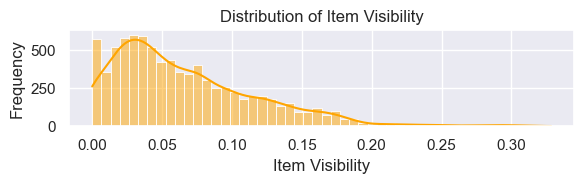

In [40]:
plt.figure(figsize=(6, 2))
sns.histplot( data=big_mart_data, x='Item_Visibility', kde=True,   color='orange'  )


plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### Right Skewed:
The distribution of Item Visibility is highly right-skewed, with most values concentrated between 0.00 and 0.10.

##### Outliers:

The boxplot highlights the presence of significant outliers, showing that a few items have much higher visibility than the majority.

##### Business-Level Insight

Most items are rarely visible to customers, while a few dominate shelf/display visibility. This suggests that store display strategy is uneven, and redistributing visibility across products could improve overall sales balance.

<Axes: xlabel='Item_Visibility'>

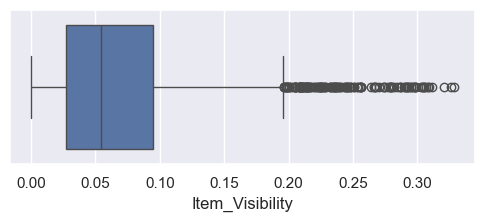

In [43]:
plt.figure(figsize=(6, 2))
sns.boxplot(x=big_mart_data['Item_Visibility'])

MRP


In [46]:
item_avg_visibility = big_mart_data.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
big_mart_data.loc[big_mart_data['Item_Visibility'] == 0, 'Item_Visibility'] = item_avg_visibility


In [48]:
Q1 = big_mart_data['Item_Visibility'].quantile(0.25)
Q3 = big_mart_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

big_mart_data['Item_Visibility'] = np.where(
big_mart_data['Item_Visibility'] > upper_limit, upper_limit, big_mart_data['Item_Visibility']
)


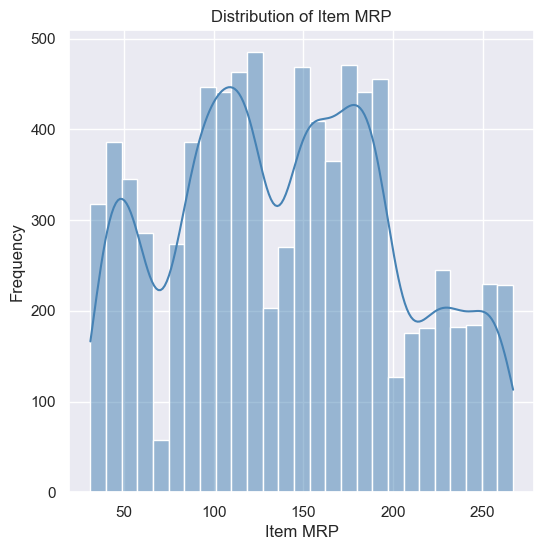

In [50]:
plt.figure(figsize=(6, 6))
sns.histplot(data=big_mart_data, x='Item_MRP', kde=True, color='steelblue')
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()


#### Insights 
##### Multimodal Distribution:
The Item MRP values are not uniformly distributed; instead, there are multiple peaks around 50, 100, and 150–170. This suggests that the products’ MRPs are set in certain price bands (possibly due to pricing strategies or common price ranges for specific categories).

##### Fewer High-Price Items:
As the Item MRP crosses 200 and above, the frequency significantly decreases. This indicates that fewer products are priced at higher MRPs, and most items are concentrated below ~200.

##### Business Insight :
This means the store's catalog mostly focuses on mid-range priced items, with limited offerings in the premium range.

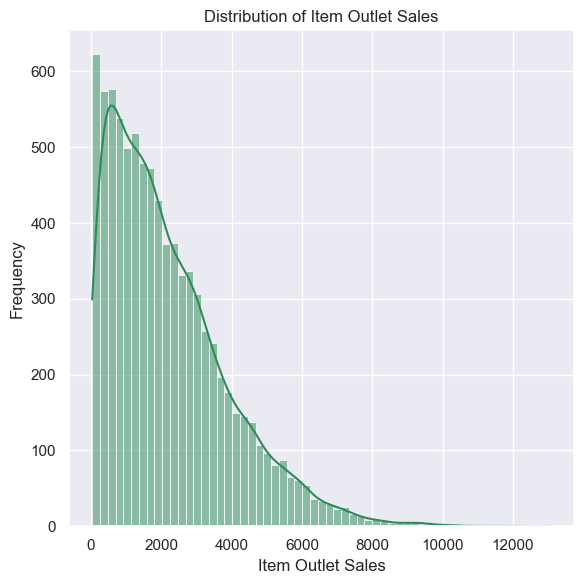

In [53]:
plt.figure(figsize=(6, 6))
sns.histplot(data=big_mart_data, x='Item_Outlet_Sales', kde=True, color='seagreen')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Insights
##### Right-Skewed Distribution:
Most of the sales values are concentrated between 0 and 2000, and the frequency declines sharply as sales increase. This indicates that the majority of items have low to moderate sales, while only a few items generate very high sales.

##### Presence of High-Sales Outliers:
There are sales values extending beyond 10,000, but their frequency is extremely low. This suggests that a small number of products act as outliers, contributing disproportionately high sales, while the bulk of products contribute relatively lower sales.

#### Business-Level Insight:
The company likely depends heavily on a few "star products" for revenue, while most items underperform. It might be useful to identify these high-performing products and replicate their success across other categories.

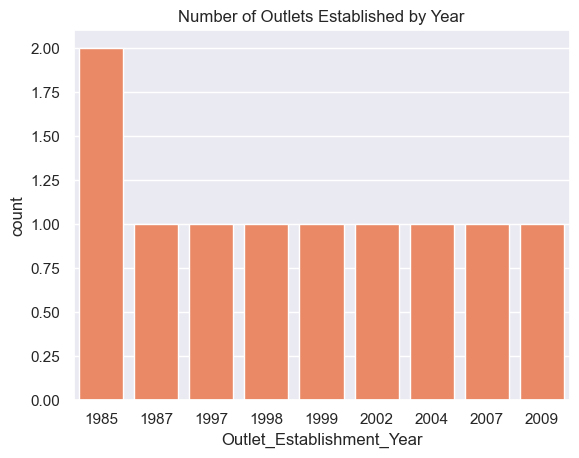

In [85]:
outlet_year_counts = big_mart_data[['Outlet_Identifier', 'Outlet_Establishment_Year']].drop_duplicates()
sns.countplot(data=outlet_year_counts, x='Outlet_Establishment_Year', color='coral')
plt.title('Number of Outlets Established by Year')
plt.show()


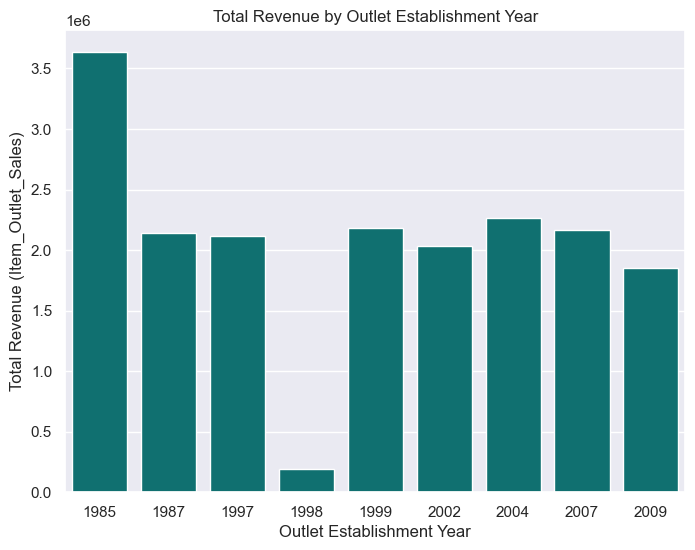

In [87]:
# Group by establishment year and sum sales
revenue_by_year = big_mart_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

revenue_by_year = revenue_by_year.sort_values(by='Outlet_Establishment_Year')

plt.figure(figsize=(8,6))
sns.barplot(data=revenue_by_year, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', color='teal')
plt.title('Total Revenue by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Revenue (Item_Outlet_Sales)')
plt.show()


Categorical_Columns

##### 1985 Outlets Drive the Highest Revenue:  
Outlets established in 1985 (2 stores) generate the maximum total revenue, highlighting strong dependence on these older outlets for business performance.
##### Steady Revenue from Later Years:  
Most years (1987–2007) have only 1 outlet each, yet they consistently generate moderate revenue (~2M). This suggests that newer outlets contribute reliably but not at the scale of the 1985 stores.
##### 1998 Outlets Underperforming:  
The single outlet from 1998 contributes very low revenue compared to others, indicating possible underperformance or operational inefficiency.

##### 2009 Outlets Lagging Behind:  
Outlets established most recently (2009) contribute less revenue than earlier years, suggesting that recent expansions have not yet scaled to match older outlets.

#### Business-Level Insight :   
The company’s revenue is disproportionately reliant on older outlets (1985), while newer outlets are fewer and contribute less. This over-dependence on aging infrastructure could be risky long term.  
Strengthening underperforming outlets (1998, 2009) and expanding into newer, modern outlets can balance revenue sources, reduce reliance on legacy stores, and ensure sustainable growth.

### Fat Content

In [60]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

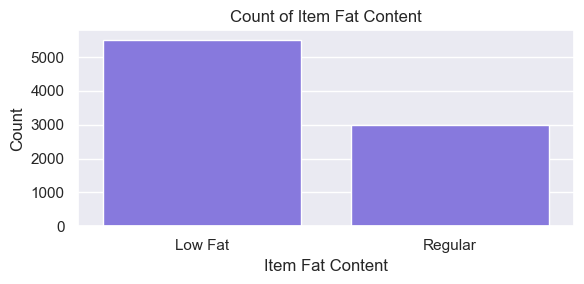

In [62]:
plt.figure(figsize=(6,3))
sns.countplot(data=big_mart_data, x='Item_Fat_Content', color='mediumslateblue')
plt.title('Count of Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Item Type

##### Low Fat items dominate :
Around 5500 items are labeled as Low Fat, which is almost double compared to Regular items (~3000).

##### Regular items are fewer :
The count of Regular fat items is significantly lower, indicating limited availability or lower variety.

##### Business-Level Insight:
 Customers are more inclined towards Low Fat products, suggesting a health-conscious trend. The retailer could expand its Low Fat product line and run targeted promotions, while also strategically positioning Regular products as premium/indulgence options.

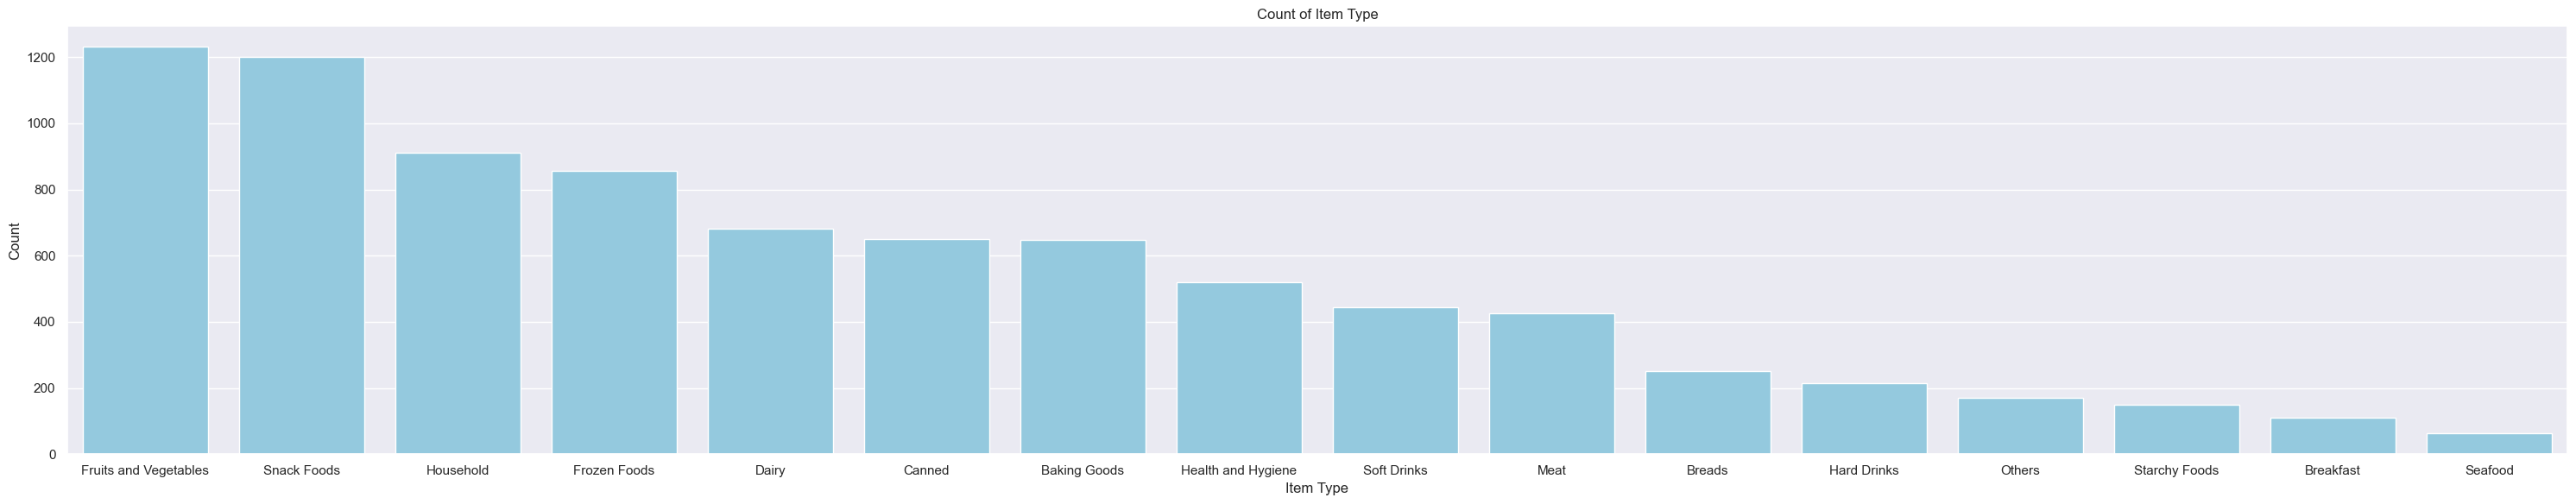

In [66]:
item_type_order = big_mart_data['Item_Type'].value_counts().index

plt.figure(figsize=(30, 6))
sns.countplot(data=big_mart_data,x='Item_Type', color='skyblue',order=item_type_order)          
plt.title('Count of Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Top categories dominate : 
Fruits & Vegetables (1250) and Snack Foods (1200) have the highest item counts, indicating a broad product variety in these categories.

#### Low presence categories : 
Categories like Seafood, Breakfast, and Starchy Foods have very few items (<150), showing limited product options.

#### Business-Level Insight:

 Customers are provided with a wide range of choices in perishable and snack items, which likely drives frequent store visits. However, the retailer could consider expanding underrepresented categories (like Seafood or Breakfast) to tap into unmet demand and diversify offerings.

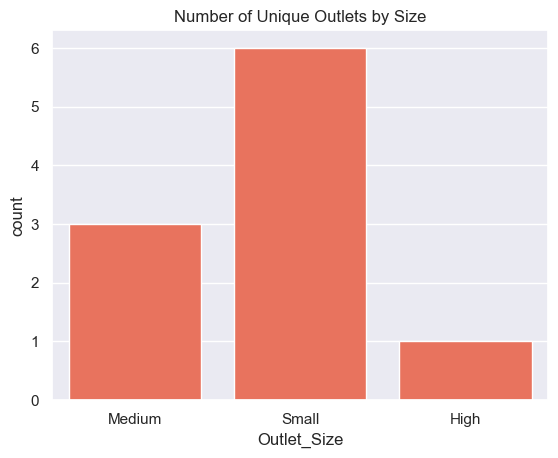

In [69]:
outlet_size_counts = big_mart_data[['Outlet_Identifier','Outlet_Size']].drop_duplicates()
sns.countplot(data=outlet_size_counts, x='Outlet_Size', color='tomato')
plt.title('Number of Unique Outlets by Size')
plt.show()


##### Dominance of Small Outlets: 
Small outlets are the most common, with 6 unique outlets. This indicates the company has a strong preference for smaller-format stores.

##### Moderate Presence of Medium Outlets:
Medium outlets (3 stores) exist in reasonable numbers but are only half as common as small outlets, suggesting mid-sized formats are not the main focus of expansion.
##### Scarcity of High-Sized Outlets:
High-sized outlets are rare (just 1 store). This shows very limited presence in large-format retail spaces, which could restrict the company’s ability to capture high-volume urban customers.
##### Business-Level Insight:  
The company’s retail footprint is heavily dependent on small outlets, which could restrict revenue scalability. While small outlets are good for penetrating local markets, the lack of medium and high-sized outlets may cap overall sales growth.  


In [76]:
revenue_by_size = big_mart_data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index()


revenue_by_size = revenue_by_size.sort_values(by='Item_Outlet_Sales', ascending=False)

print(revenue_by_size)


  Outlet_Size  Item_Outlet_Sales
2       Small       8.958743e+06
1      Medium       7.489719e+06
0        High       2.142664e+06


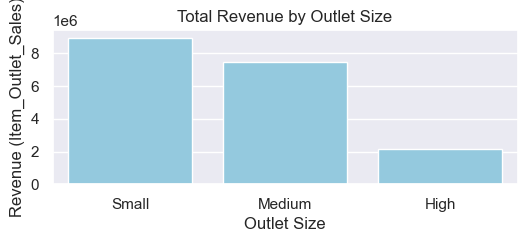

In [97]:
plt.figure(figsize=(6,2))
sns.barplot(data=revenue_by_size, x='Outlet_Size', y='Item_Outlet_Sales', color='skyblue')
plt.title('Total Revenue by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Revenue (Item_Outlet_Sales)')
plt.show()


##### Strong Revenue from Small Outlets:
Small outlets, which are most common (6 stores), also generate the highest overall revenue. This shows that the business is heavily reliant on small-format stores for both presence and earnings.
##### Medium Outlets Punch Above Their Weight:
Despite being only 3 in number, medium outlets generate nearly as much revenue as small outlets. This indicates that medium outlets are more productive on a per-store basis and represent a strong opportunity for growth.
##### High Outlets Underperforming:
High-sized outlets are rare (only 1) and contribute the least revenue. This suggests either lack of investment in large outlets or underutilization of their potential in high-volume markets.
##### Business-Level Insight
The company’s revenue concentration mirrors its outlet distribution — heavily dependent on small stores. However, medium outlets demonstrate high revenue efficiency, signaling that expansion in this format could significantly boost overall performance.  
Investing in more medium outlets and revamping high outlets could diversify revenue sources, reduce dependency on small stores, and capture urban demand more effectively.

In [72]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [81]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Lable Encoding 

In [77]:
encoder = LabelEncoder()

In [43]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [44]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [45]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [46]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [47]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [50]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso


def evaluate(model, X_test, Y_test):
    preds = model.predict(X_test)
    r2 = r2_score(Y_test, preds)
    rmse = np.sqrt(mean_squared_error(Y_test, preds))
    return r2, rmse

results = {}

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_grid = {'alpha': [0.01, 0.1, 1]}
lasso_cv = GridSearchCV(lasso, lasso_grid, cv=3, scoring='r2')
lasso_cv.fit(X_train, Y_train)
r2, rmse = evaluate(lasso_cv.best_estimator_, X_test, Y_test)
results['Lasso'] = {'Best Params': lasso_cv.best_params_, 'R2': r2, 'RMSE': rmse}

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=2)
dt_grid = {'max_depth': [5, 10]}
dt_cv = GridSearchCV(dt, dt_grid, scoring='r2', cv=3)
dt_cv.fit(X_train, Y_train)
r2, rmse = evaluate(dt_cv.best_estimator_, X_test, Y_test)
results['Decision Tree'] = {'Best Params': dt_cv.best_params_, 'R2': r2, 'RMSE': rmse}

#  Random Forest Regressor
rf = RandomForestRegressor(random_state=2)
rf_grid = {'n_estimators': [100, 200]}
rf_cv = GridSearchCV(rf, rf_grid, scoring='r2', cv=3)
rf_cv.fit(X_train, Y_train)
r2, rmse = evaluate(rf_cv.best_estimator_, X_test, Y_test)
results['Random Forest'] = {'Best Params': rf_cv.best_params_, 'R2': r2, 'RMSE': rmse}

#  XGBoost Regressor
xgb = XGBRegressor(random_state=2)
xgb_grid = {'learning_rate': [0.05, 0.1]}
xgb_cv = GridSearchCV(xgb, xgb_grid, scoring='r2', cv=3)
xgb_cv.fit(X_train, Y_train)
r2, rmse = evaluate(xgb_cv.best_estimator_, X_test, Y_test)
results['XGBoost'] = {'Best Params': xgb_cv.best_params_, 'R2': r2, 'RMSE': rmse}

# results 
for model, res in results.items():
    print(f"\n {model}")
    print(f"Best Parameters: {res['Best Params']}")
    print(f"R² Score: {res['R2']:.4f}")
    print(f"RMSE: {res['RMSE']:.2f}")



 Lasso
Best Parameters: {'alpha': 0.1}
R² Score: 0.4891
RMSE: 1255.88

 Decision Tree
Best Parameters: {'max_depth': 5}
R² Score: 0.5802
RMSE: 1138.38

 Random Forest
Best Parameters: {'n_estimators': 200}
R² Score: 0.5524
RMSE: 1175.43

 XGBoost
Best Parameters: {'learning_rate': 0.05}
R² Score: 0.5705
RMSE: 1151.51


In [ ]:

final_model = DecisionTreeRegressor(max_depth=5, random_state=2)
final_model.fit(X_train, Y_train)

y_pred = final_model.predict(X_test)

r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(" Final Decision Tree Model")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


In [122]:
output_df = pd.DataFrame({
    'Actual_Sales': Y_test.values,
    'Predicted_Sales': y_pred
})


X_test_reset = X_test.reset_index(drop=True)
final_output = pd.concat([X_test_reset, output_df], axis=1)

final_output.to_csv("final_predictions_decision_tree.csv", index=False)
print(" Predictions saved to final_predictions_decision_tree.csv")


 Predictions saved to final_predictions_decision_tree.csv


### Business Recommendations



#### Inventory Management 
- Focus on high-performing categories (Fruits & Vegetables, Snack Foods)
- Optimize stock levels based on outlet size and location

####  **Product Strategy**:
- Prioritize Low Fat products (65% consumer preference)
- Consider pricing strategies for bimodal MRP distribution

####  **Outlet Optimization**:
- Leverage insights from high-performing establishment years
- Tailor product mix based on outlet characteristics


###  Visibility Enhancement:
- Improve product visibility for items with low visibility
- Strategic placement for high-value items
